In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Overview of data

In [59]:
data = pd.read_csv("data/top-chess-players.csv")
data.head()

,name,rank,rating,country,title,profilelink,profileimage,lastupdated
0,Magnus Carlsen,1,2830,Norway,GM,https://www.chess.com/players/magnus-carlsen,https://images.chesscomfiles.com/uploads/v1/ma...,03-12-2023
1,Fabiano Caruana,2,2796,United States,GM,https://www.chess.com/players/fabiano-caruana,https://images.chesscomfiles.com/uploads/v1/ma...,03-12-2023
2,Hikaru Nakamura,3,2788,United States,GM,https://www.chess.com/players/hikaru-nakamura,https://images.chesscomfiles.com/uploads/v1/ma...,03-12-2023
3,Ding Liren,4,2780,China,GM,https://www.chess.com/players/ding-liren,https://images.chesscomfiles.com/uploads/v1/ma...,03-12-2023
4,Ian Nepomniachtchi,5,2770,Russia,GM,https://www.chess.com/players/ian-nepomniachtchi,/bundles/web/images/user-image.007dad08.svg,03-12-2023


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44096 entries, 0 to 44095
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          44096 non-null  object
 1   rank          44096 non-null  object
 2   rating        44096 non-null  object
 3   country       44096 non-null  object
 4   title         18802 non-null  object
 5   profilelink   44096 non-null  object
 6   profileimage  44096 non-null  object
 7   lastupdated   44096 non-null  object
dtypes: object(8)
memory usage: 2.7+ MB


## Data Cleanning

In [61]:
def remove_unwanted(text):

    if text == "e" or text == "N" or text == "None":
        return None
    else:
        return text

data["rank"] = data["rank"].apply(remove_unwanted)
data["rating"] = data["rating"].apply(remove_unwanted)

# Exploratory Data Analysis (EDA)

## General EDA

In [62]:
latest_data = data[data["lastupdated"] == "03-12-2023"]

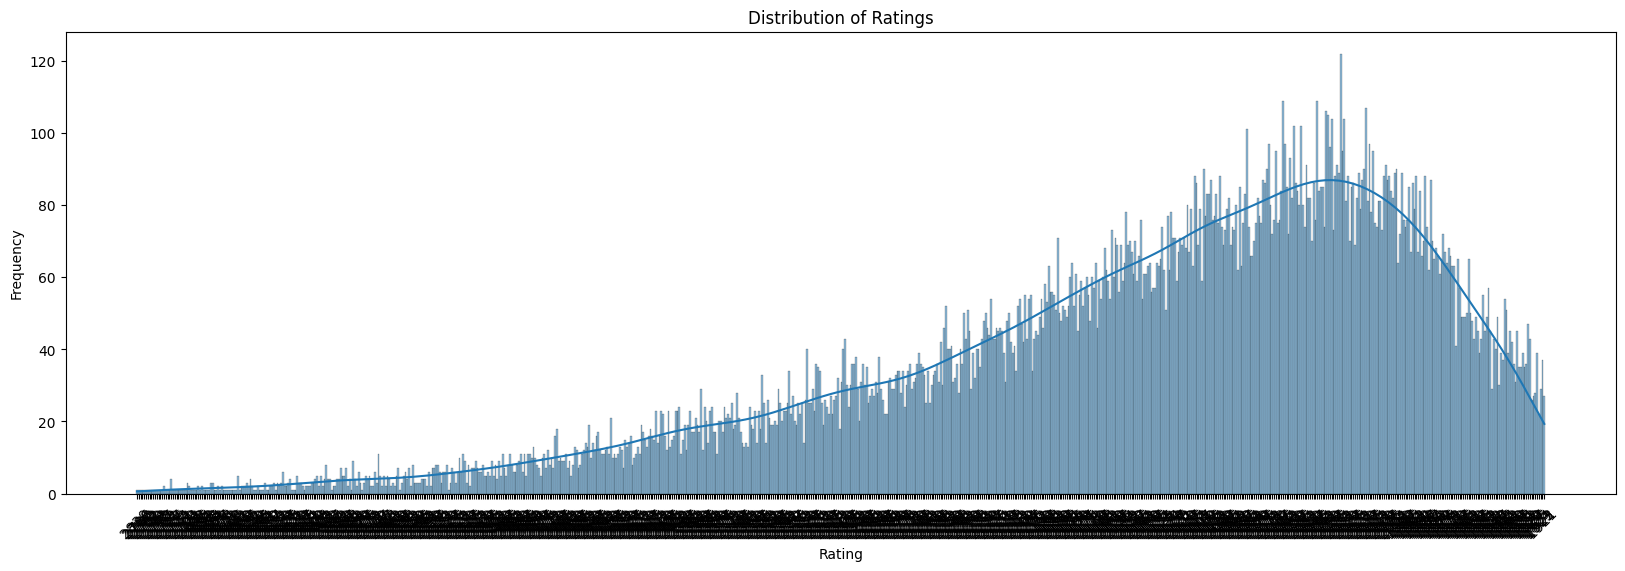

In [63]:
plt.figure(figsize=(20, 6))
sns.histplot(latest_data['rating'], bins=2, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

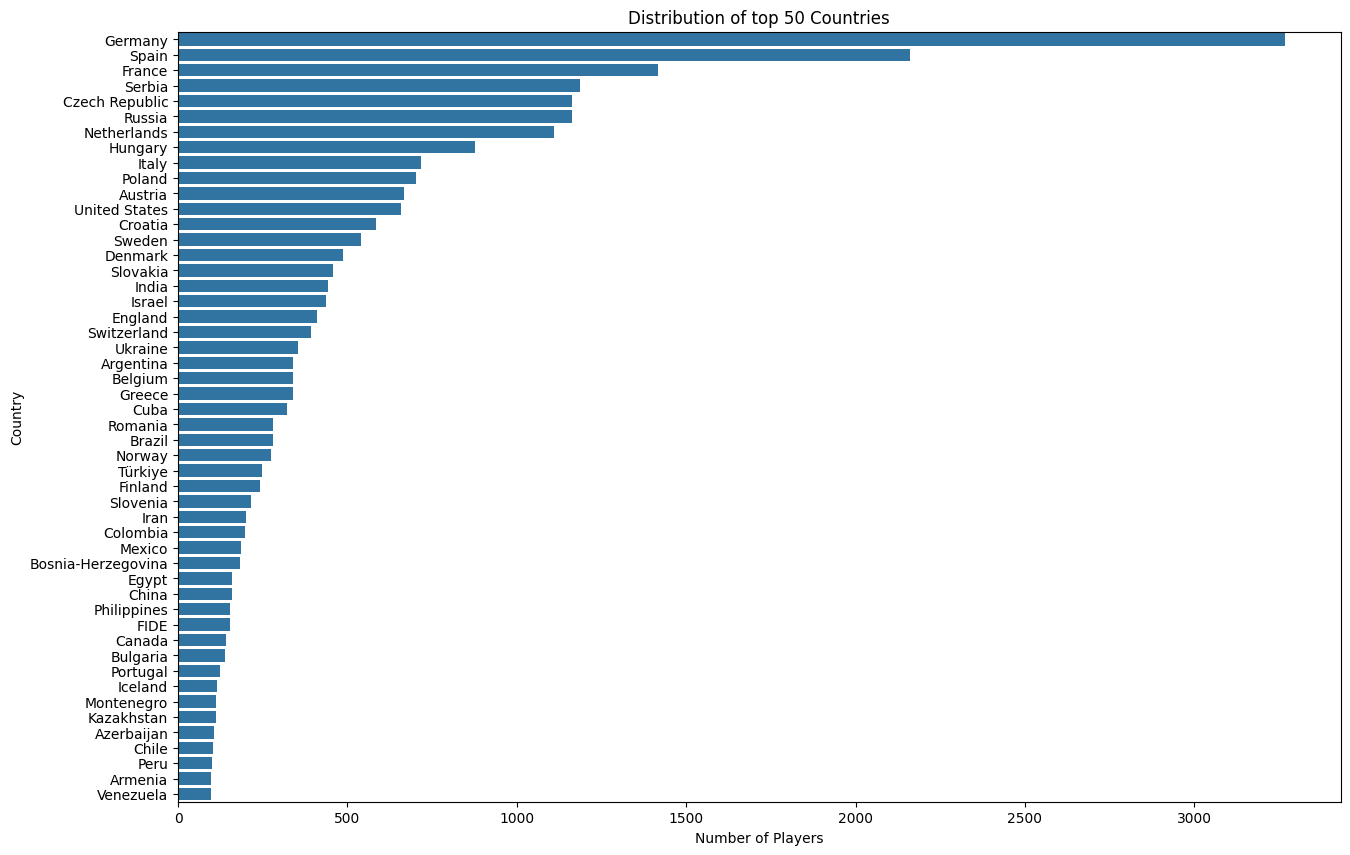

In [64]:
# Plotting the distribution of players' countries
plt.figure(figsize=(15, 10))
sns.countplot(y='country', data=latest_data, order=latest_data['country'].value_counts().head(50).index)
plt.title('Distribution of top 50 Countries')
plt.ylabel('Country')
plt.xlabel('Number of Players')
plt.show()

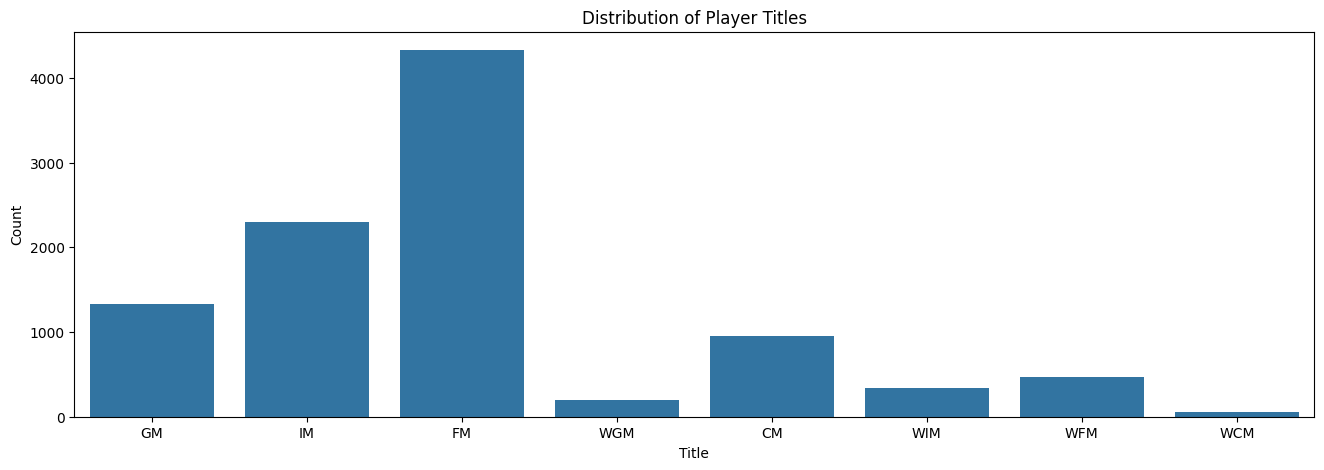

In [65]:
plt.figure(figsize=(16, 5))
sns.countplot(x='title', data=latest_data)
plt.title('Distribution of Player Titles')
plt.xlabel('Title')
plt.ylabel('Count')
plt.show()

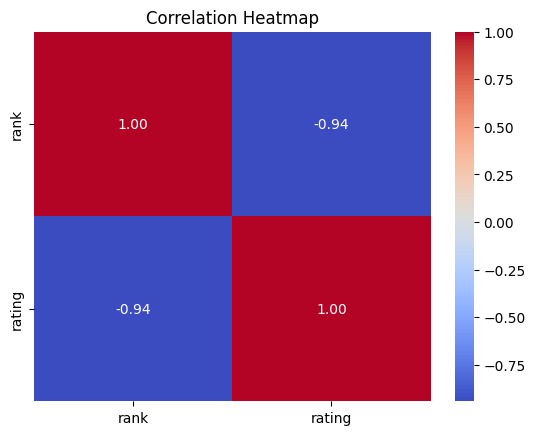

In [68]:
correlation_matrix = data[['rank', 'rating']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [77]:
import plotly.express as px

# Create a countplot DataFrame for Player Titles by Country
title_counts = data.groupby(['country', 'title']).size().reset_index(name='count')

# Filter to include only the top 50 countries based on player count
top_countries = data['country'].value_counts().head(50).index
title_counts_top50 = title_counts[title_counts['country'].isin(top_countries)]

# Create an interactive bar plot
bar_fig = px.bar(title_counts_top50, x='country', y='count', color='title',
                 labels={'country': 'Country', 'count': 'Count', 'title': 'Title'},
                 title='Distribution of Player Titles in Top 50 Countries')
bar_fig.update_xaxes(tickangle=45)
bar_fig.show()


## EDA for Player's Performace Over the time

In [79]:
import plotly.express as px

player_name = "Praggnanandhaa Rameshbabu"
# Assuming you have a DataFrame named df with the appropriate structure
# Make sure your 'lastupdated' column is in datetime format
data['lastupdated'] = pd.to_datetime(data['lastupdated'], format='%d-%m-%Y')

# Filter data for Magnus Carlsen
magnus_df = data[data['name'] == player_name]

# Line plot for Magnus Carlsen's Rating over time
rating_fig = px.line(magnus_df, x='lastupdated', y='rating',
                     title='{} - Rating Over Time'.format(player_name),
                     labels={'lastupdated': 'Date', 'rating': 'Rating'})
rating_fig.show()

# Line plot for Magnus Carlsen's Ranking over time
rank_fig = px.line(magnus_df, x='lastupdated', y='rank',
                   title='{} - Ranking Over Time'.format(player_name),
                   labels={'lastupdated': 'Date', 'rank': 'Ranking'})
rank_fig.show()


# EDA Report

### 1. Overview of the Dataset:

The dataset includes information about top chess players, such as their names, rankings, ratings, countries, titles, profile links, profile images, and the date of the last update.

### 2. Basic Statistics:

- The dataset consists of 23375 chess players.
- The players represent various countries, with Magnus Carlsen being the top-ranked player.
- Ratings range from 1900 to 2830, with Magnus Carlsen having the highest rating.

### 3. Player Distribution:

#### 3.1 Distribution of Ratings:

A histogram was created to visualize the distribution of player ratings.

Key Observations:
- The majority of players have ratings in the range of 2640 to 2800.
- Magnus Carlsen has the highest rating in the dataset.

#### 3.2 Distribution of Countries:

A bar plot was generated to illustrate the distribution of players across countries.

Key Observations:
- Players are represented from various countries, with the Germany and Spain having multiple representatives.
- The dataset shows a diverse international presence.



#### 4.1 Title Distribution:

A countplot was created to display the distribution of player titles.

Key Observations:
- Most players in the dataset hold the title of FIDE Master (FM).
- The countplot provides an overview of the distribution of titles among players.


### Players Performance Over Time:

A similar time series line plot was generated to show changes in Player's ranking over time.

**Note: As he data will be collected day by day the picture will be more clear**


This report summarizes key insights obtained through exploratory data analysis. Further analysis and in-depth investigation can be performed based on the specific questions and objectives you have for the dataset.
